In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [46]:
# names = ["cJSON", "Hashmap", "Flattened", "Serial"]

# give nicer names
names = ["Tree", "Nested Hashmap", "Flattened Struct", "Indexed String"]

rows = []
# twitter measurement time
data = [
            [60.2339, 49.3238, 53.9777, 60.7755, 60.777],
            [60.0574, 57.3929, 49.8694, 53.507, 57.8562],
            [64.474, 51.1145, 50.3161, 54.0222, 58.3576],
            [57.9821, 61.146, 53.7519, 62.6825, 64.0363],
        ]

for i, d in enumerate(data):
    for x in d:
        rows.append({'type' : names[i], 'dataset' : 'twitter', 'access' : x })
        
# Yelp build time
data = [
            [2.41078, 2.43933, 2.4254, 2.41501, 2.40656],
            [2.5934, 2.59184, 2.60951, 2.60139, 2.59061],
            [1.72849, 1.72708, 1.72652, 1.7279, 1.73144],
            [2.46973, 2.46706, 2.45018, 2.45214, 2.45356],
        ]

for i, d in enumerate(data):
    for x in d:
        rows.append({'type' : names[i], 'dataset' : 'yelp', 'access' : x })

df = pd.DataFrame(rows)

# compute mb/sec for build time
df.loc[df['dataset'] == 'twitter', 'access_mb_per_sec'] = 7200 / df[df['dataset'] == 'twitter']['access']
df.loc[df['dataset'] == 'yelp', 'access_mb_per_sec'] = 229 / df[df['dataset'] == 'yelp']['access']

In [47]:
df.to_csv('results.csv', index=None)

In [49]:
df.groupby(['dataset', 'type'])['access'].describe()

count       mean       std       min       25%  \
dataset type                                                               
twitter Flattened Struct    5.0  55.656880  5.849462  50.31610  51.11450   
        Indexed String      5.0  59.919760  4.119445  53.75190  57.98210   
        Nested Hashmap      5.0  55.736580  4.040436  49.86940  53.50700   
        Tree                5.0  57.017580  5.172887  49.32380  53.97770   
yelp    Flattened Struct    5.0   1.728286  0.001918   1.72652   1.72708   
        Indexed String      5.0   2.458534  0.009130   2.45018   2.45214   
        Nested Hashmap      5.0   2.597350  0.007993   2.59061   2.59184   
        Tree                5.0   2.419416  0.013150   2.40656   2.41078   

                               50%       75%       max  
dataset type                                            
twitter Flattened Struct  54.02220  58.35760  64.47400  
        Indexed String    61.14600  62.68250  64.03630  
        Nested Hashmap    57.39290  57.85620  60.05740  
        Tree              60.23390  60.77550  60.77700  
yelp    Flattened Struct   1.72790   1.72849   1.73144  
        Indexed String     2.45356   2.46706   2.46973  
        Nested Hashmap     2.59340   2.60139   2.60951  
        Tree               2.41501   2.42540   2.43933

In [50]:
vals = df[df['dataset'] == 'twitter'].groupby('type').mean().reset_index()
vals_std = df[df['dataset'] == 'twitter'].groupby('type').std().reset_index()

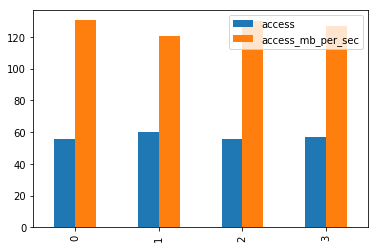

In [51]:
vals.plot.bar()


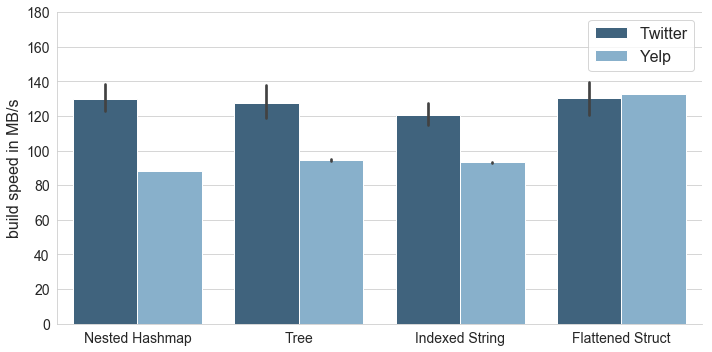

In [123]:
sns.set_style('whitegrid')
pal = [sns.color_palette("Blues_d", 9)[2], sns.color_palette("Blues_d", 9)[7]]
sns.set_palette(pal)
plt.figure(figsize=(10,5))
ax = sns.barplot(x="type",
                 y="access_mb_per_sec",
                 hue="dataset",
                 data=df,
                 order=["Nested Hashmap", "Tree", "Indexed String", "Flattened Struct"])
plt.xlabel('')
plt.ylabel('build speed in MB/s', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=[l.capitalize() for l in labels], fontsize=16, loc='upper right')
plt.ylim(0, 180)
plt.tight_layout()
plt.savefig('access_time.pdf', dpi=120, transparent=True)